# Installing requirements

## Please, run the cell bellow to install all the necessary dependencies

In [12]:
!pip install scikit-learn tqdm matplotlib

# Training Loop
## The cell bellow will run training of two Decision Tree models with varying value of maximum depth. Three datasets are involved. You can add any dataset to the training session and get the results list in the format of (depth, baseline accuracy, new model accuracy). List of depth values can also be altered to any desirable values for experimenting.

In [11]:
from sklearn.datasets import load_iris, load_wine
from sklearn.model_selection import train_test_split
from model import DecisionTreeClassifier, DecisionTreeClassifierAltered
from sklearn.metrics import accuracy_score
import warnings
import numpy as np
from tqdm import tqdm


def read_dataset(path):
    with open(path, 'r') as f:
        lines = f.readlines()
    X = []
    y = []
    for line in lines:
        line_list = line.split(',')
        X.append(list(map(lambda x: float(x), line_list[:-1])))
        y.append(int(line_list[-1]))
    return np.array(X), np.array(y)


def get_results(depth_list, X, y):
    results = []
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.2, random_state=42)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        for depth in tqdm(depth_list):
            model_baseline = DecisionTreeClassifier(depth)
            model_baseline.fit(X_train, y_train)
            model_altered = DecisionTreeClassifierAltered(depth)
            model_altered.fit(X_train, y_train)
            results.append((depth,
                            accuracy_score(model_baseline.predict(X_test), y_test),
                            accuracy_score(model_altered.predict(X_test), y_test)))
    return results

depth_list = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]

data_iris = load_iris()
X_iris = data_iris['data'] 
y_iris = data_iris['target']

data_wine = load_wine()
X_wine = data_wine['data']
y_wine = data_wine['target']

X_banknote, y_banknote = read_dataset('data_banknote_authentication.txt')

results_iris = get_results(depth_list, X_iris, y_iris)
results_wine = get_results(depth_list, X_wine, y_wine)
results_banknote = get_results(depth_list, X_banknote, y_banknote)


100%|██████████| 12/12 [07:04<00:00, 35.35s/it]


## Cells below run the visualization of obtained results. Function plot_graph will plot depth vs. accuracy for both baseline and altered models, so that the comparison can be drawn from the visualization.

In [13]:
import matplotlib.pyplot as plt

def plot_graph(results):
    depth, acc_base, acc_alt = list(zip(*results))
    plt.figure(figsize=(12, 6))
    plt.plot(depth, acc_base, marker='o', label='Test accuracy of baseline model')
    plt.plot(depth, acc_alt, marker='v', label='Test accuracy of alternative model')
    plt.legend()
    plt.xlabel('Depth of the tree')
    plt.ylabel('Test accuracy')
    plt.grid()
    plt.show()

## Plot for the Iris dataset

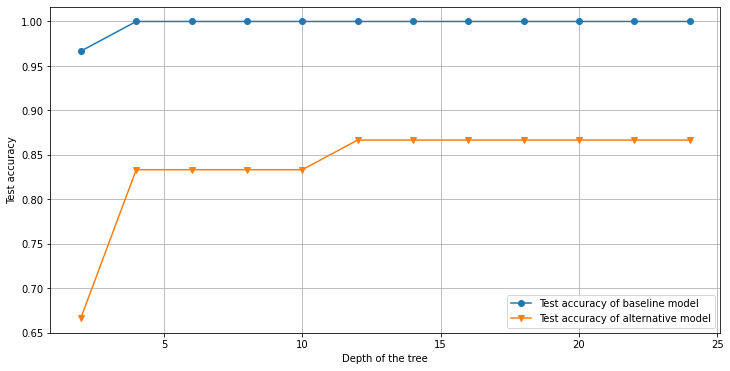

In [14]:
plot_graph(results_iris)

## Plot for the wine dataset

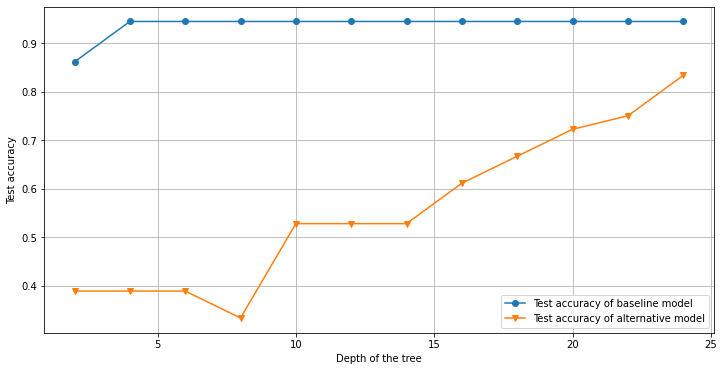

In [16]:
plot_graph(results_wine)

## Plot for the banknote dataset

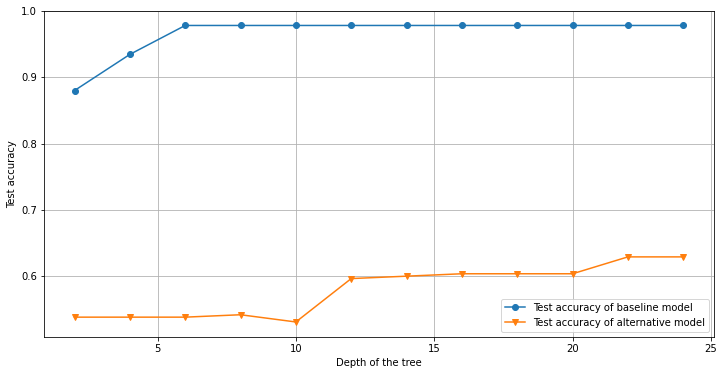

In [15]:
plot_graph(results_banknote)